# Análisis de Series Temporales

### Contenidos
1. Espectrograma
2. Wavelets
4. EMD
5. EEMD
6. Transformada cruzada y coherencia ondita

### Introducción
En el presente cuaderno se busca mostrar de manera suscinta el modo en que diversas técnicas de análiss de series temporales operan sobre señales de infrasonido y sismografo. Para ello se exponen brevemente los fundamentos de cada técnica, y se muestra su implementación en Python. Para los ejemplos se utilizan señales de infrasonido y sismógrafo, en una traza temporal que registra un evento volcano-tectónico (VT), ocurrido en el volcán Peteroa, en el departamento de Malargüe, provincia de Mendoza, el día 28 de diciembre de 2017.<br>

In [22]:
import numpy as np

with open('20170328_22_time.txt') as time:
    dates = time.read().splitlines()
print(f'{dates[0]:<30} ==> {type(dates[0])}')

d64 = np.array(dates, dtype='datetime64')
print(f'{d64[0]:<30} ==> {np.dtype(d64[0])}')

utc = d64.astype('O')
print(f'{utc[0]:<30} ==>{type(utc[0])}')

with open('20170328_22_signal.txt') as signal_str:
    signal = list(map(float, signal_str))
print(f'{signal[0]:<30} ==> {type(signal[0])}')

sampling_frequency = 100

2017-03-28 22:39:44.278077     ==> <class 'str'>
2017-03-28T22:39:44.278077     ==> datetime64[us]
<30 ==><class 'datetime.datetime'>
1.19166666667                  ==> <class 'float'>


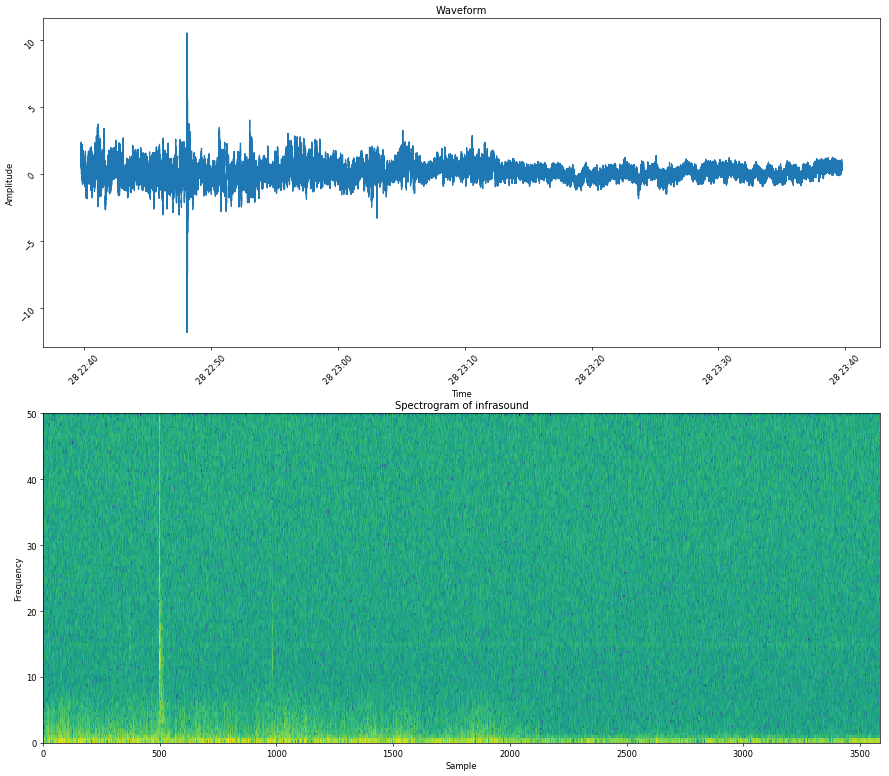

In [50]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
# mpl.rcParams['savefig.dpi'] = 60
# mpl.rcParams['figure.dpi'] = 60

#fig,ax = plt.subplot()
#fig.autofmt_xdate()
fig = plt.figure(figsize=(18,16), dpi=60) # (width, height) in inches.
ax1, ax2 = fig.subplots(2)

ax1.plot(utc,signal)
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.specgram(signal,Fs=sampling_frequency)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

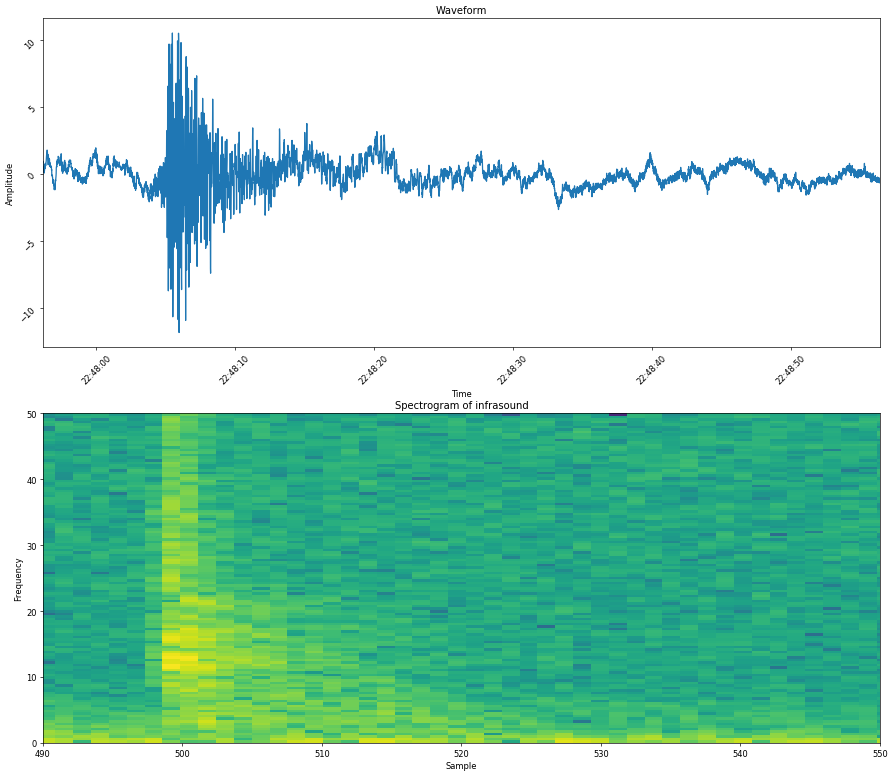

In [46]:
fig = plt.figure(figsize=(18,16), dpi=60) # (width, height) in inches.
ax1, ax2 = fig.subplots(2)
ax1.plot(utc,signal)
ax1.set_xlim([utc[49000],utc[55000]])
ax1.set_title('Waveform')
ax1.tick_params(labelrotation=45)
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

ax2.specgram(signal,Fs=sampling_frequency)
ax2.set_title('Spectrogram of infrasound')
ax2.set_xlim([490,550])
ax2.set_xlabel('Sample')
ax2.set_ylabel('Frequency')
plt.show()

.W5745..6C35E4 | 2017-03-29T01:00:00.000000Z - 2017-03-29T01:59:59.990000Z | 100.0 Hz, 360000 samples


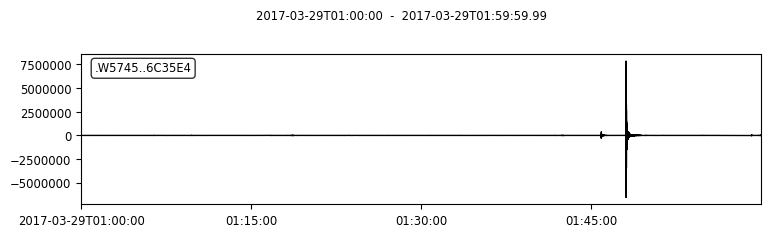

In [13]:
from obspy import read

st = read('201729030100-W5745-6C35E4.sac')
print(st[0])
sismo = st.plot()

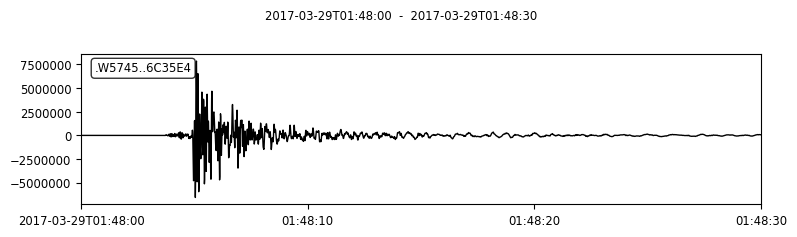

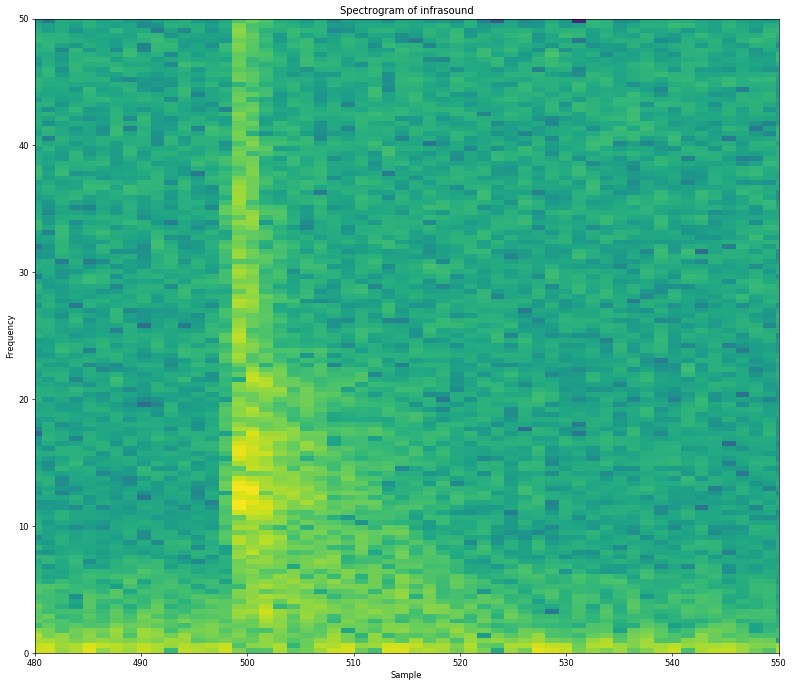

In [54]:
dt = st[0].stats.starttime
sismo_cut = st.plot(starttime = dt+48*60, endtime=dt+48*60+30)

fig5 = plt.figure(figsize=(16,14), dpi=60) # (width, height) in inches.
ax5 = fig5.add_subplot(111)
ax5.specgram(signal,Fs=sampling_frequency)
ax5.set_title('Spectrogram of infrasound')
ax5.set_xlim([480,550])
ax5.set_xlabel('Sample')
ax5.set_ylabel('Frequency')
plt.show()

In [5]:
import pycwt
import pywt
# wave, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(signal,1.0)

In [6]:
from PyEMD import EMD